In [ ]:
''''
Create Folder 'TF_Object_Detection' in the C drive

1. Download the TFOD and Place it on 'TF_Object Detection' folder
    - https://github.com/tensorflow/models/tree/v1.13.0
    
2. Create A folder 'utils' in 'TF_Object Detection'

3. Download 'Google probuf' and place it on 'TF_Object Detection'
    - https://github.com/protocolbuffers/protobuf/releases


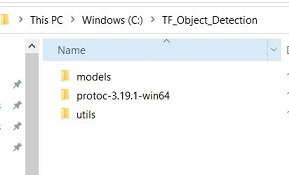

In [ ]:
'''

4.Create below the folders on 'utils' folder
    - training
    - images
        - train
        - test
    - inference_graph
    
5.Upload or copy below the files on 'utils' folder
    - faster_rcnn_inception_v2_coco_2018_01_28 (Extracted files)
        - http://download.tensorflow.org/models/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz
    - xml_to_csv.py
    - generate_tfrecord.py
    
6.Copy and paste respected Annotation and image files on images(train and test) folder
    

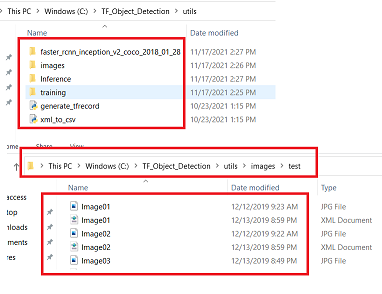

In [ ]:
'''
7.Copy the Configuration file corresponidng to pretrained model you have choosen
'''
- Copy the config file from 'C:\TFOD_Demo\models\research\object_detection\samples\configs'
    - Here were are copying 'faster_rcnn_inception_v2_coco.config' to 'C:\TF_Object_Detection\utils\training'

In [ ]:
8. Paste 'labelmap.pbtxt' on the path 'C:\TF_Object_Detection\utils\training'

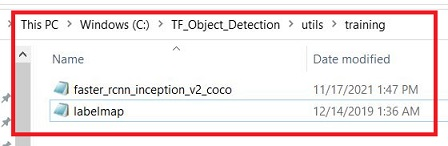

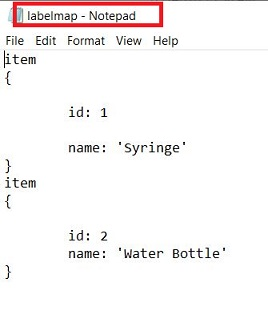

In [ ]:
# Compile protobuf  and convert to .py
# "C:\TF_Object_Detection\protoc-3.19.1-win64\bin\protoc.exe" object_detection/protos/*.proto --python_out=.

# Protobuff to py conversion
C:\TF_Object_Detection\models\research>"C:\TF_Object_Detection\protoc-3.19.1-win64\bin\protoc.exe" object_detection/protos/*.proto --python_out=.

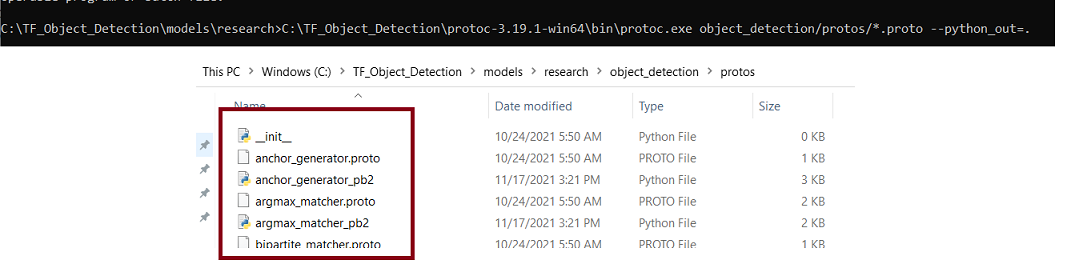

In [ ]:
# Install Object Detection : 

C:\TF_Object_Detection\models\research>python setup.py install

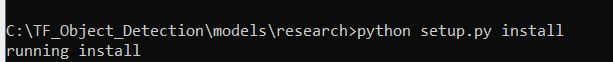

In [ ]:
# Convert XML to CSV using the for train and test Seperately

C:\TF_Object_Detection\utils>python xml_to_csv.py C:\TF_Object_Detection\utils

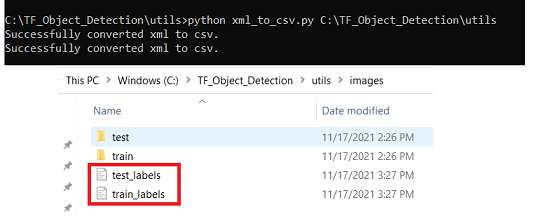

In [ ]:
# Generate TF records from train_csv and test_csv

C:\TF_Object_Detection\utils>python generate_tfrecord.py 
    --csv_input="C:/TF_Object_Detection/utils/images/train_labels.csv" 
    --image_dir="C:/TF_Object_Detection/utils/images/train" 
    --output_path="C:/TF_Object_Detection/utils/images/train.record"
    
C:\TF_Object_Detection\utils>python generate_tfrecord.py 
    --csv_input="C:/TF_Object_Detection/utils/images/test_labels.csv" 
    --image_dir="C:/TF_Object_Detection/utils/images/test" 
    --output_path="C:/TF_Object_Detection/utils/images/test.record"

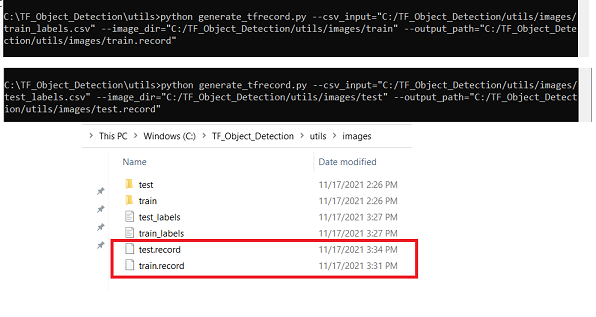

In [ ]:
'''
Configure Configuration file for Training

Open faster_rcnn_inception_v2_coco.config file and modify based on the requirements
        - C:\TF_Object_Detection\utils\training\faster_rcnn_inception_v2_coco.config
        
'''        
- Change num_classes: 2

- fine_tune_checkpoint: "C:/TF_Object_Detection/models/research/faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt"

- num_steps: 50

- train_input_reader: 
    - input_path: "C:/TF_Object_Detection/utils/images/train.record"
    - label_map_path: "C:/TF_Object_Detection/utils/training/labelmap.pbtxt"

- eval_input_reader
    - input_path: "C:/TF_Object_Detection/utils/images/test.record"
    - label_map_path: "C:/TF_Object_Detection/utils/training/labelmap.pbtxt"

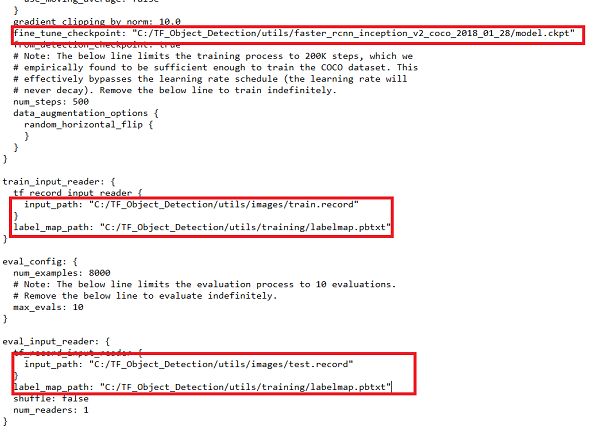

In [ ]:
# copy train.py file

Copy 'train.py' file from 'research\object_detection\legacy' to 'research' folder

In [ ]:
# copy Deployment and nets Folder

Copy folders 'deployment' and 'nets' from 'models\research\slim' to 'models\research'

In [ ]:
# Run Training

C:\TF_Object_Detection\models\research> python train.py 
    --logtostderr 
    --train_dir="C:/TF_Object_Detection/utils/training/" 
    --pipeline_config_path="C:/TF_Object_Detection/utils/training/faster_rcnn_inception_v2_coco.config"

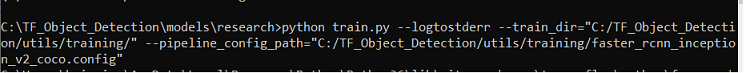

In [ ]:
# Copy export_inference_graph.py 

Copy and paste the 'export_inference_grap.py' file from '\models\research\object_detection' to '\models\research'

In [ ]:
# Convert the checkpoints files into modules using below the comman

C:\TF_Object_Detection\models\research> python export_inference_graph.py 
    --input_type image_tensor 
    --pipeline_config_path "C:/TF_Object_Detection/utils/training/faster_rcnn_inception_v2_coco.config" 
    --trained_checkpoint_prefix "C:/TF_Object_Detection/utils/training/model.ckpt-1000" 
    --output_directory "C:/TF_Object_Detection/utils/inference_graph"
      